### 基于Kmeans的鸢尾花分类

#### KMeans是无监督聚类算法,只需要x特征,无需Y标签,K指定最终的分类数


#### KMeans可以处理分类问题,但不能直接处理回归问题,但能通过特征工程显著提升其他回归模型性能

In [ ]:
# 导包
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

In [ ]:
# 加载数据
iris = load_iris()
X, y = iris.data, iris.target

# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# K-means聚类
def model_train_predict(X_scaled, k):
    # 训练模型
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    y_pred=model.predict(X_scaled)
    
    # 评估 实际应用中不知道真是y标签,无法评估
    ari = adjusted_rand_score(y, y_pred)
    print(f"Adjusted Rand Index: {ari:.2f}")
    return y_pred

In [ ]:
# 可视化（PCA降维）
def pltshow(y_pred,k):
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap="viridis")
    plt.title(f"y_pred Labels_k={k}")
    plt.show()

c:\Anaconda3\envs\pytorch-cpu\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\pytorch-cpu\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Adjusted Rand Index: 0.57


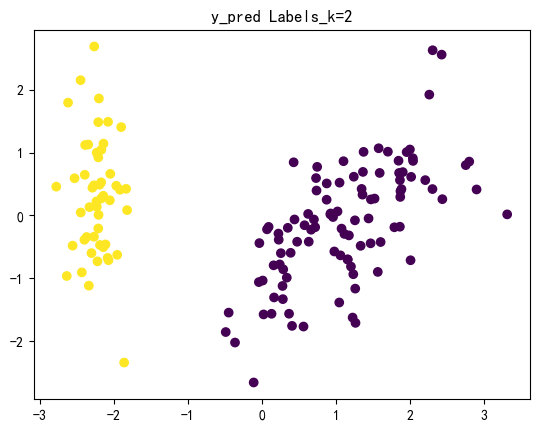

c:\Anaconda3\envs\pytorch-cpu\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\pytorch-cpu\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Adjusted Rand Index: 0.62


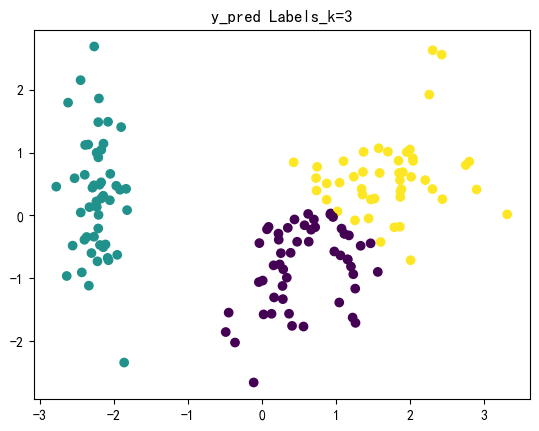

c:\Anaconda3\envs\pytorch-cpu\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\pytorch-cpu\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Adjusted Rand Index: 0.47


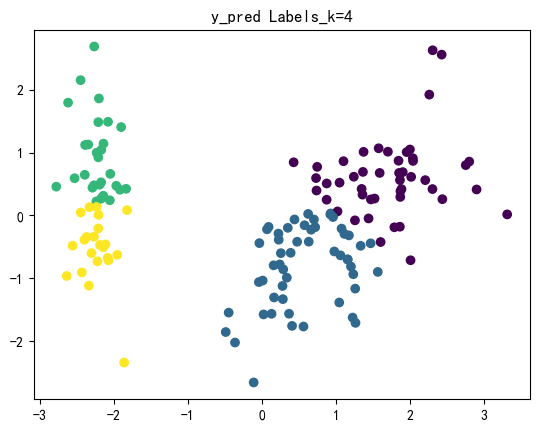

In [ ]:
for i in range(2, 5):
    pltshow(model_train_predict(X_scaled, i),i)


c:\Anaconda3\envs\pytorch-cpu\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\pytorch-cpu\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda3\envs\pytorch-cpu\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\pytorch-cpu\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with

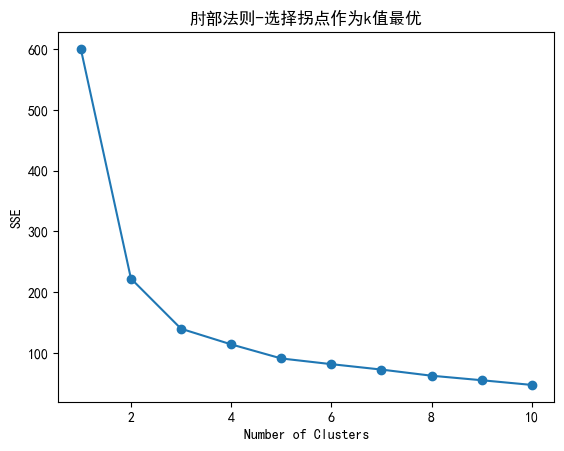

最佳K值（肘部法则）: 2


In [ ]:

# 肘部法则选择K值 选择拐点作为k值最优
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), sse, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("肘部法则-选择拐点作为k值最优")
plt.show()
# 找到拐点（最佳K值）
best_k = 0
max_diff = 0
for i in range(1, len(sse) - 1):
    # 计算相邻K值的SSE变化率
    diff = sse[i-1] - sse[i]
    if diff > max_diff:
        max_diff = diff
        best_k = i + 1  # K值从1开始计数

print(f"最佳K值（肘部法则）: {best_k}")
